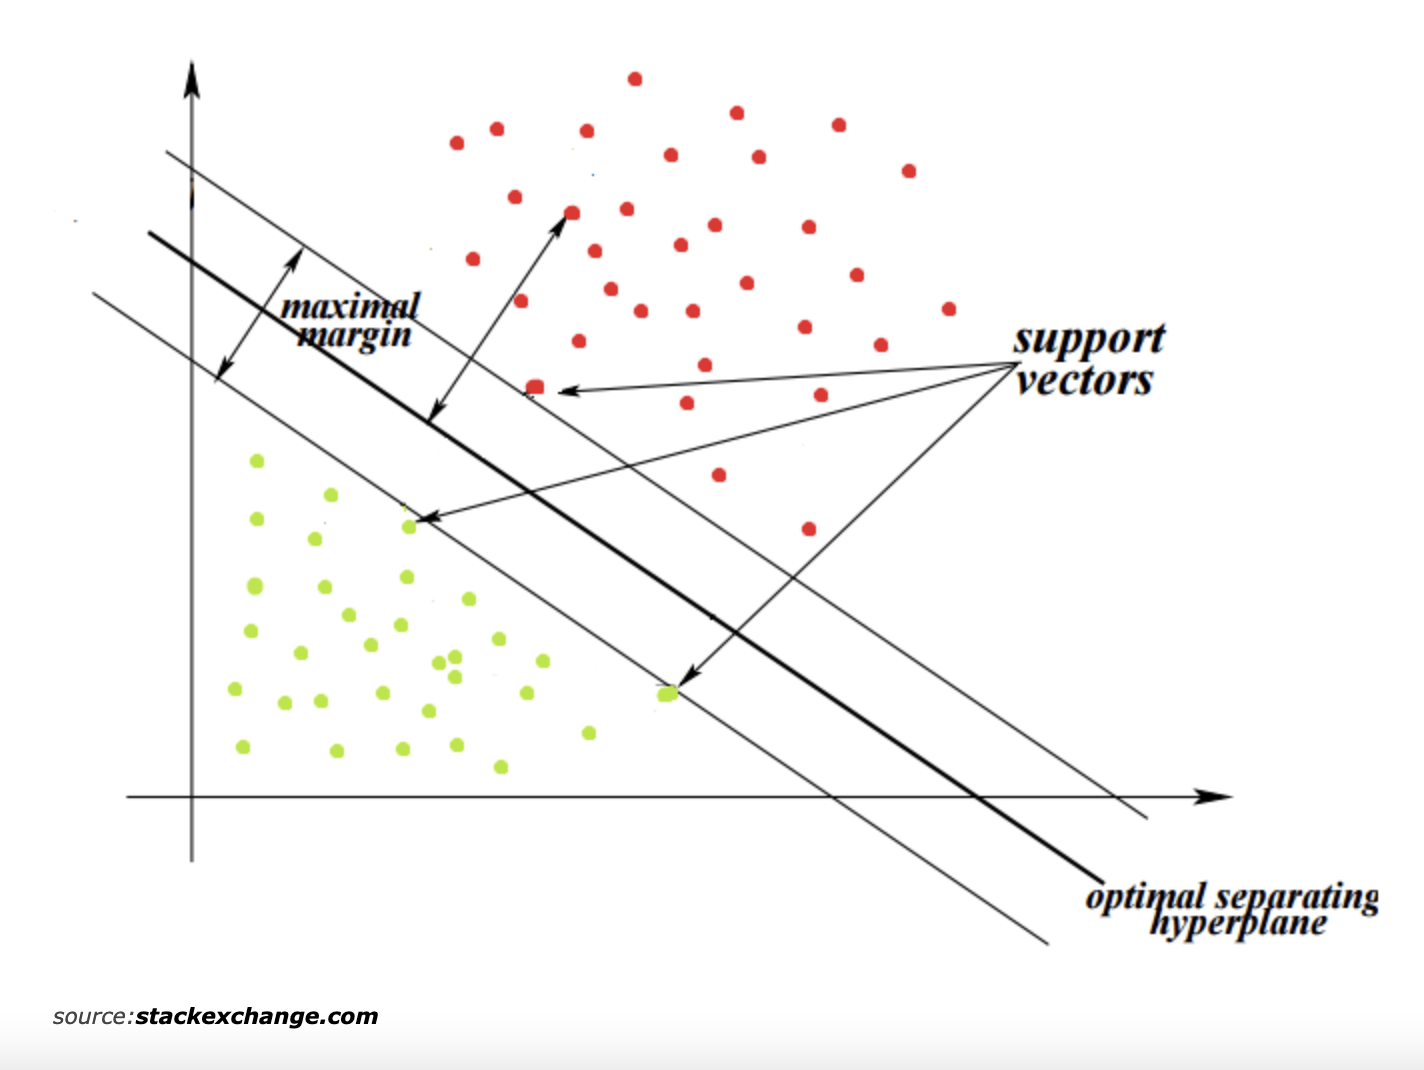

In [1]:
from IPython.display import Image
Image(filename='foto/svm.png') 

- Öyle bir line cizecegim ki, bu iki class'i (kirmizi ve yesil) ayirirken maximum margin olsun.
- support vector'ler margine etki ediyor.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.drop(["id","Unnamed: 32"], axis=1, inplace= True)
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

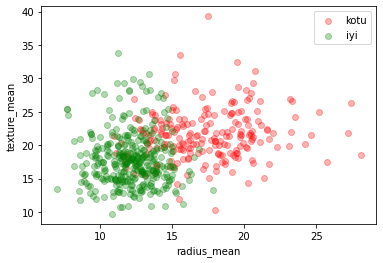

In [6]:
plt.scatter(M.radius_mean, M.texture_mean, color="red", label="kotu", alpha=0.3)
plt.scatter(B.radius_mean, B.texture_mean, color="green", label="iyi", alpha=0.3)
plt.ylabel("texture_mean")
plt.xlabel("radius_mean")
plt.legend()
plt.show()

In [7]:
data.diagnosis= [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"], axis=1)

In [8]:
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [10]:
#SVM
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [11]:
print("accuracy:", nb.score(x_test , y_test))

accuracy: 0.935672514619883
